# **СИИ lab1**

ФИО: Чэнь Жохань

ИСУ: 413107

### Линейная и логистическая регрессия

#### 0. import library

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset

#### 1. Датасет

In [96]:
data = pd.read_csv('California_Houses.csv')
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [97]:
print('Строки и столбики:', data.shape)

Строки и столбики: (20640, 14)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [99]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


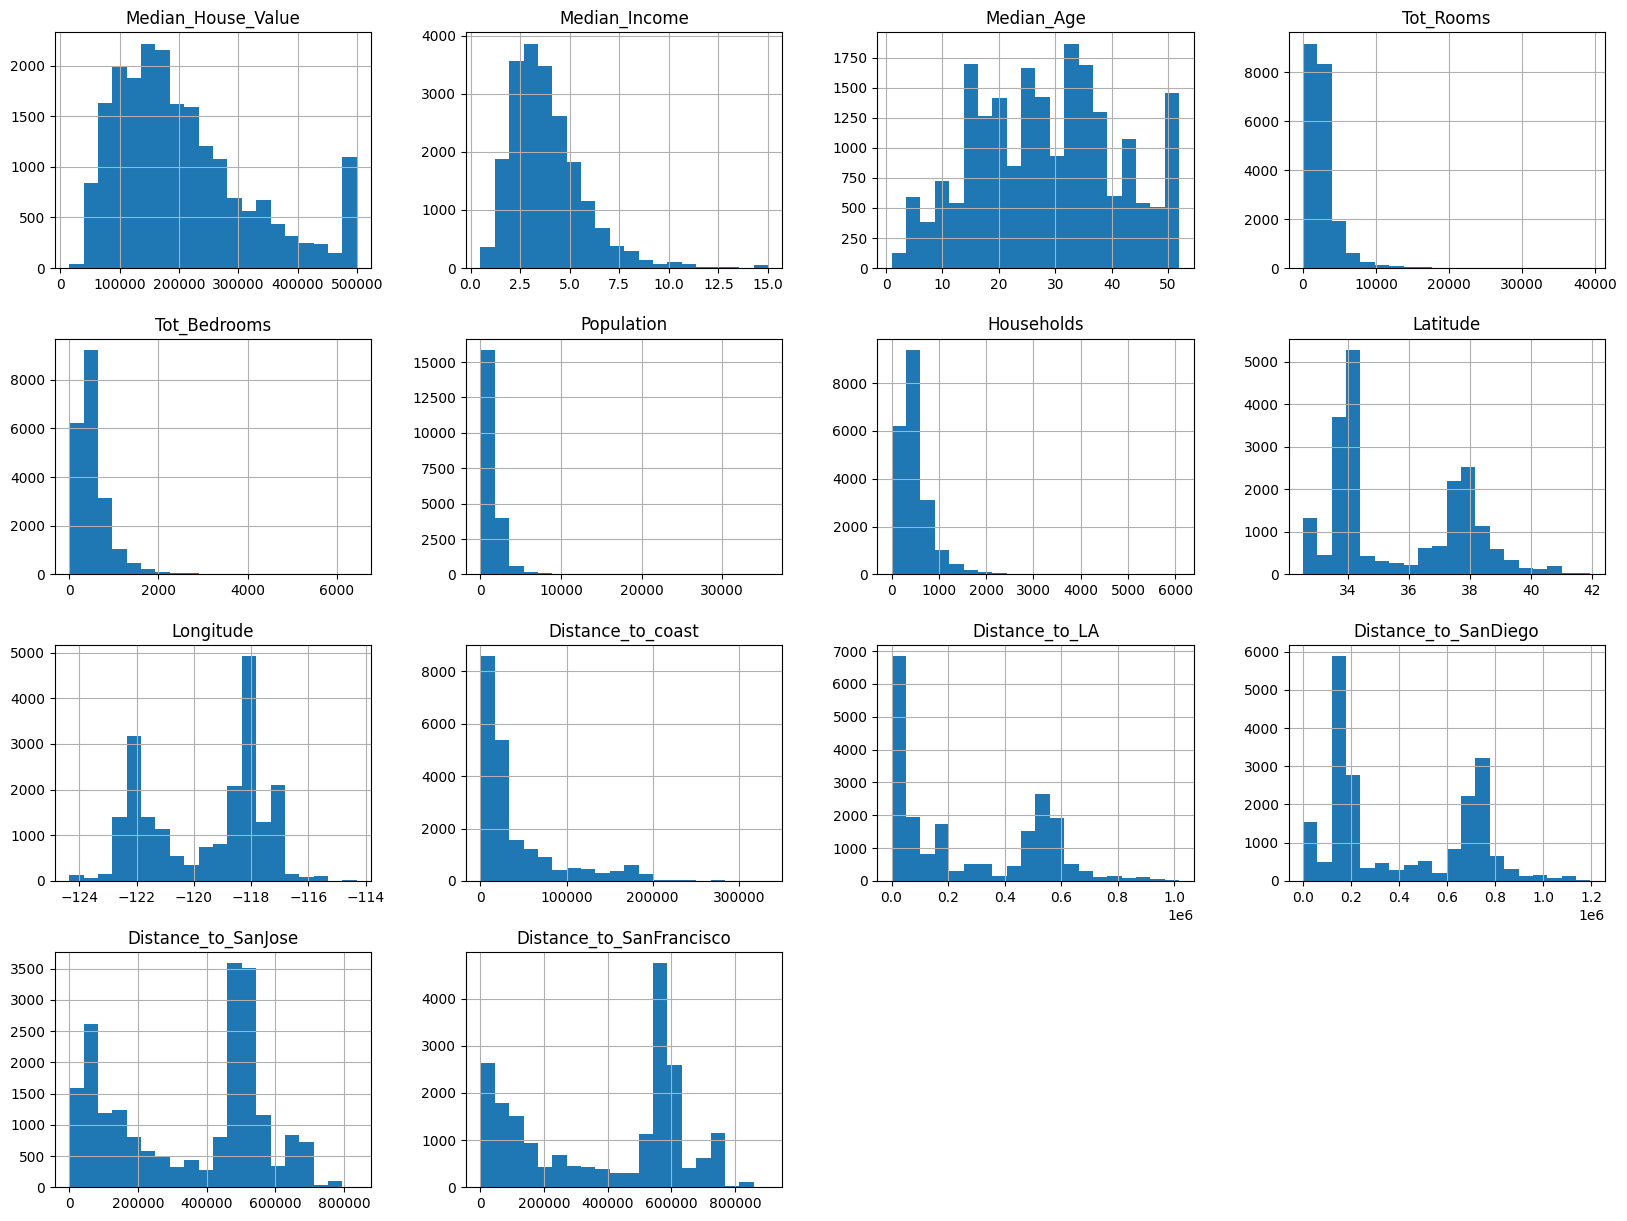

In [100]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

Функция для того, чтобы рисовать зависимость матрицы:

In [101]:
plt.style.use('default')

def correlation_matrix(table):
    
    numeric_cols = table.select_dtypes(include=[np.number]).columns
    corr_matrix = table[numeric_cols].corr().values

    plt.figure(figsize=(14, 10))
    
    im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, label='Correlation коэф.')
    
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
    
    plt.title('Correlation matrix')
    plt.tight_layout()
    plt.show()


### 2. Предварительная обработка данных

2.1 пустое значение

In [102]:
data.isnull().any(axis=0)

Median_House_Value          False
Median_Income               False
Median_Age                  False
Tot_Rooms                   False
Tot_Bedrooms                False
Population                  False
Households                  False
Latitude                    False
Longitude                   False
Distance_to_coast           False
Distance_to_LA              False
Distance_to_SanDiego        False
Distance_to_SanJose         False
Distance_to_SanFrancisco    False
dtype: bool

Нет пустого значения, идём дальше

2.2 повторные данные

In [103]:
data = data.drop_duplicates()

data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


тоже нет повторное строки, то мы начинаем выбрать нужное столбики.

### 2.3 Добыча и просеивание

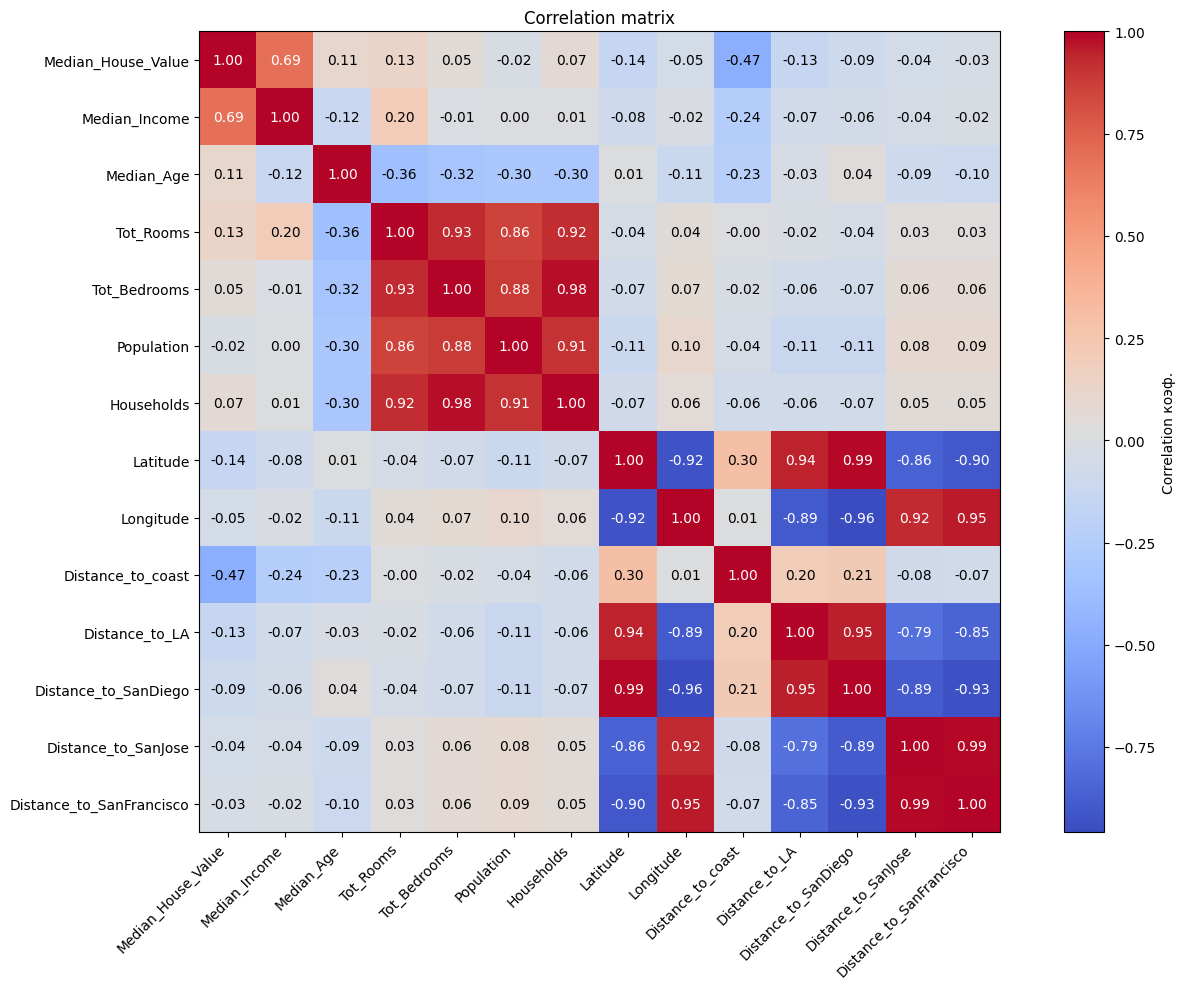

In [104]:
correlation_matrix(data)

Удалить похожие и оставить один колонка из противоположное

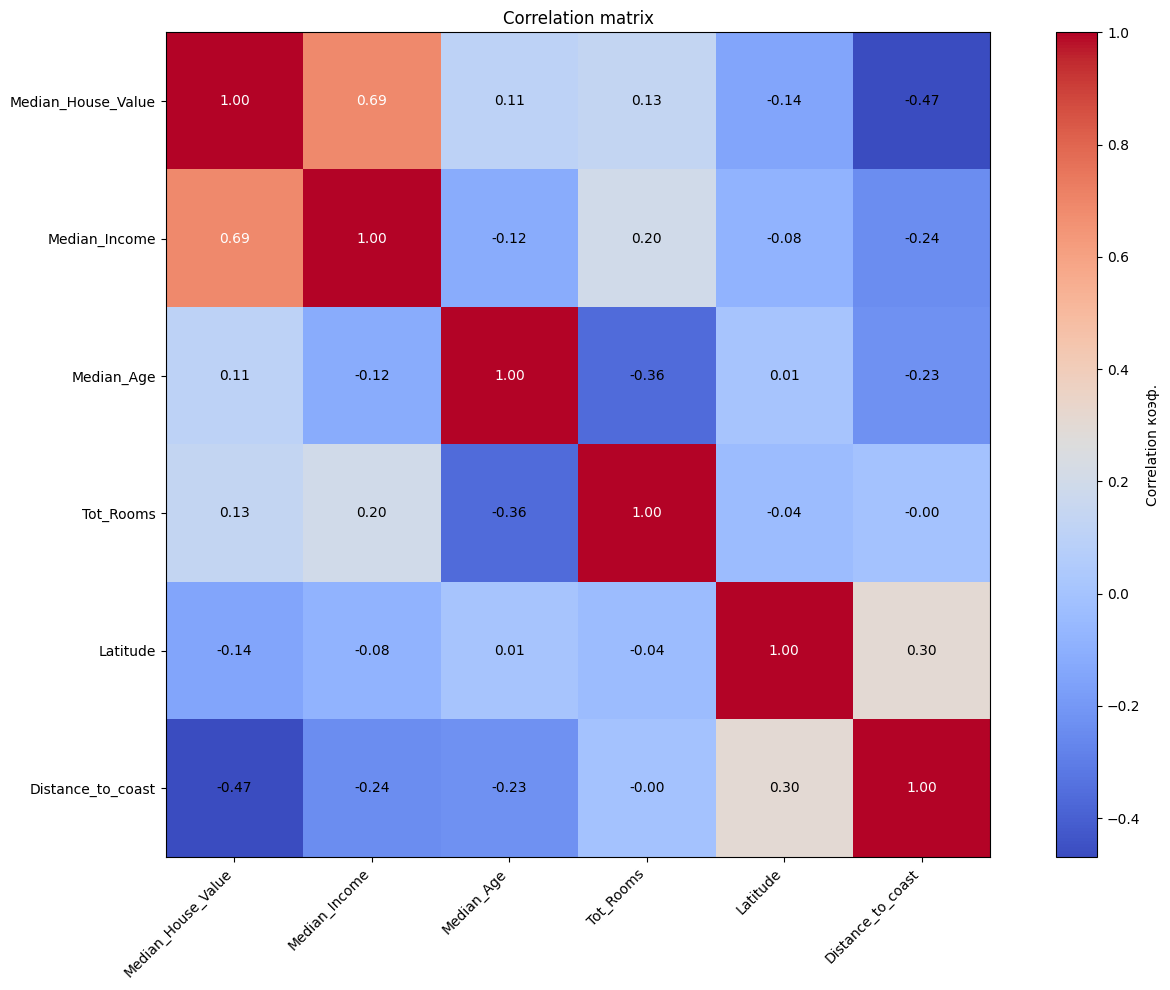

In [105]:
data_copy = data.copy()

data_copy = data_copy.drop(columns=['Tot_Bedrooms', 'Population', 'Longitude', 'Households', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'])

correlation_matrix(data_copy)

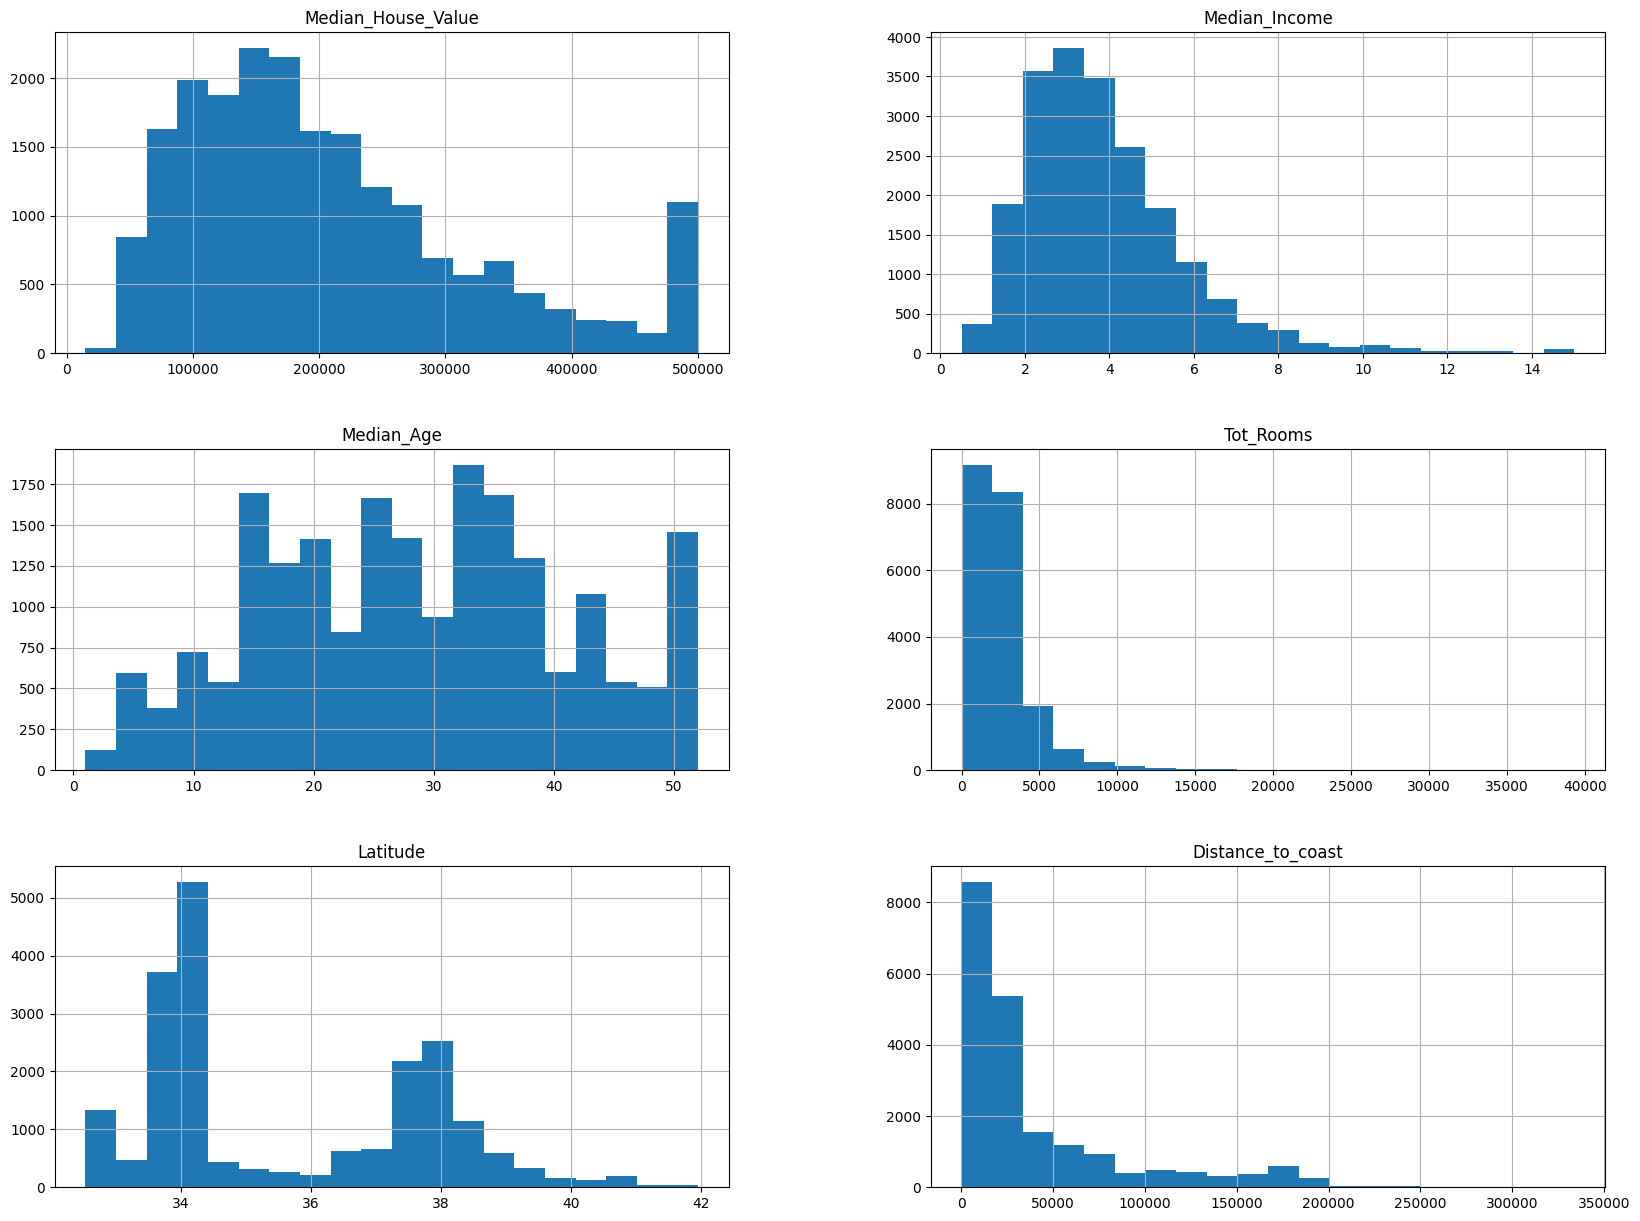

In [106]:
data_copy.hist(bins=20, figsize=(20, 15))
plt.show()

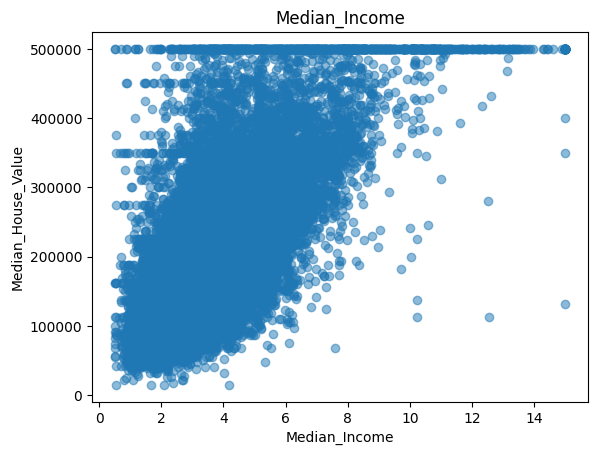

In [107]:
plt.scatter(data_copy['Median_Income'], data_copy['Median_House_Value'], alpha=0.5)
plt.xlabel('Median_Income')
plt.ylabel('Median_House_Value')
plt.title('Median_Income')
plt.show()

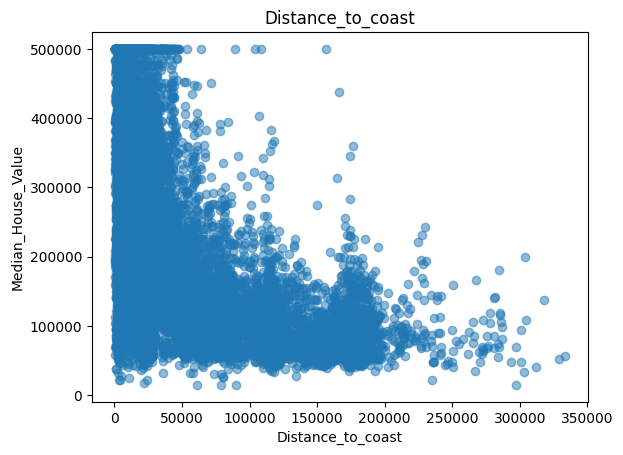

In [108]:
plt.scatter(data_copy['Distance_to_coast'], data_copy['Median_House_Value'], alpha=0.5)
plt.xlabel('Distance_to_coast')
plt.ylabel('Median_House_Value')
plt.title('Distance_to_coast')
plt.show()

In [109]:
data_copy.head()
data_copy.to_csv('data_preprocessing.csv', index=False)

#### 2.4 Нормальзация данных

z - score нормальзация

In [110]:
def z_score(x):
    x = (x-np.mean(x))/np.std(x)
    return x

Нормальзуем каждые колонки

In [111]:
cols = ['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']
data_copy_norm = data_copy.copy()
for col in cols:
    data_copy_norm[col] = z_score(data_copy[col])

cols_X = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']

X = data_copy_norm[cols_X]
y = data_copy_norm['Median_House_Value']

X.to_csv('input.csv', index=False)
y.to_csv('output.csv', index=False)

### 3.  class модели

#### module model_linear

In [134]:
class model_linear:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = torch.randn((num_features, 1), dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)

        losses = []
        for _ in range(self.num_iterations):
            y_pred = torch.matmul(X, self.weights) + self.bias

            loss = torch.mean((y_pred - y) ** 2)
            losses.append(loss.item())

            dw = (2 / num_samples) * torch.matmul(X.T, (y_pred - y))
            db = 2 * torch.mean(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return losses

    def predict(self, X):
        return torch.matmul(X, self.weights) + self.bias
    

### 4. Обучение модель

In [135]:
X = pd.read_csv('input.csv').values
y = pd.read_csv('output.csv').values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = model_linear(0.01, 1000)

losses = model.fit(X_train, y_train)

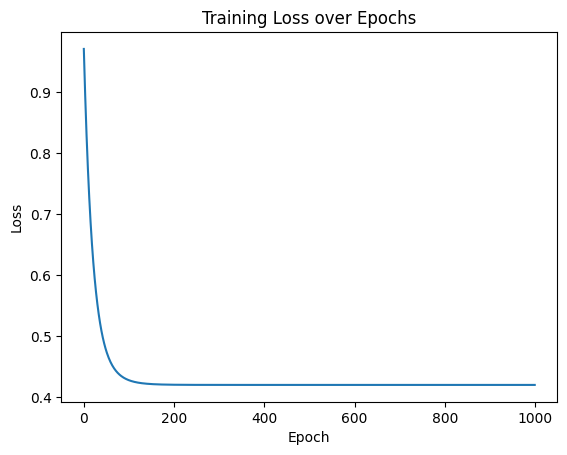

In [140]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 5. Оценка модели

In [137]:
def calculate_metrics(y_true, y_pred):
    # MSE
    mse = torch.mean((y_true - y_pred) ** 2)
    
    # RMSE
    rmse = torch.sqrt(mse)
    
    # MAE
    mae = torch.mean(torch.abs(y_true - y_pred))
    
    # R²
    ss_total = torch.sum((y_true - torch.mean(y_true)) ** 2)
    ss_residual = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    return {
        'MSE': mse.item(),
        'RMSE': rmse.item(),
        'MAE': mae.item(),
        'R2': r2.item()
    }

In [138]:
y_train_pred = model.predict(X_train)
metrics_train = calculate_metrics(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
metrics_pred = calculate_metrics(y_test, y_test_pred)

print("Метрики обучания:")
print(f"MSE: {metrics_train['MSE']}")
print(f"RMSE: {metrics_train['RMSE']}")
print(f"MAE: {metrics_train['MAE']}")
print(f"R²: {metrics_train['R2']}")

print("Метрики тестирование:")
print(f"MSE: {metrics_pred['MSE']}")
print(f"RMSE: {metrics_pred['RMSE']}")
print(f"MAE: {metrics_pred['MAE']}")
print(f"R²: {metrics_pred['R2']}")

Метрики обучания:
MSE: 0.4200615882873535
RMSE: 0.6481215953826904
MAE: 0.4774623215198517
R²: 0.565964937210083
Метрики тестирование:
MSE: 0.4026648700237274
RMSE: 0.6345587968826294
MAE: 0.4600115120410919
R²: 0.6320451498031616


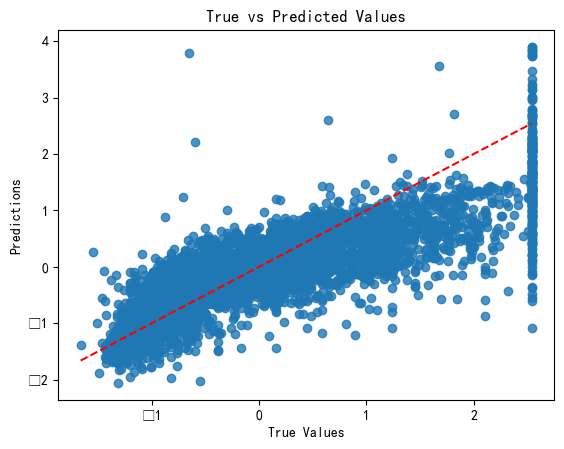

In [ ]:
plt.scatter(y_test.detach().numpy(), y_test_pred.detach().numpy(), alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

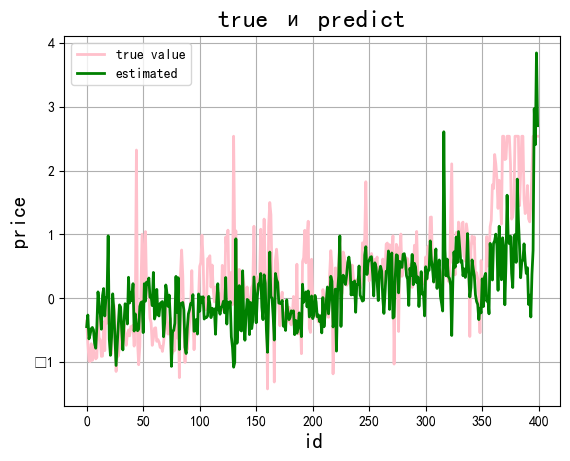

In [188]:
n_points = 400
t = np.arange(n_points)

plt.figure(facecolor='w')
plt.plot(t, y_test[:n_points], 'pink', lw=2, label=u'true value')
plt.plot(t, y_test_pred[:n_points], 'green', lw=2, label=u'estimated')
plt.legend(loc = 'best')
plt.title('true и predict', fontsize=18)
plt.xlabel('id', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.grid()
plt.show()